In [ ]:
#stand 25.10.24
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
import pandas as pd 

current_laserdiode = 0.08  #A
current_amplitude = 0.020  #A
current_frequency = 1
voltage_heater = 1         #V
voltage_amplitude = 0.050  #V
voltage_frequency = 1
linewidth = 5e6            #1/s
t = np.linspace(0, 10, 1000)
optical_power = np.empty(300)
peak_wavelength = np.empty(300)

def current_over_time(t, current_laserdiode, current_amplitude, current_frequency):
    return current_laserdiode + current_amplitude * np.sin(2 * np.pi * current_frequency * t)

def voltage_over_time(t, voltage_heater, voltage_amplitude, voltage_frequency):
    return voltage_heater + voltage_amplitude * np.sin(2 * np.pi * voltage_frequency * t)

def wavelength_from_current(current):           #chip 1 aus Grafik fehlt daten
    return 1553.8      #nm

def laseroutput(current_over_time, voltage_over_time):

    #current_power_data readout
    df = pd.read_csv('current_power_data.csv', nrows = 9)              #erste 9 Datenpunkte
    df.columns = df.columns.str.strip()
    tck_current_power = splrep(df['Current (mA)'], df['Optical Power (mW)'])  

    #voltage_shift_data readout
    df2 = pd.read_csv('voltage_shift_data.csv', nrows = 20)              #ersten 20 Datenpunkte
    df2.columns = df2.columns.str.strip()
    tck_voltage_shift = splrep(df2['Voltage (V)'], df2['Wavelength Shift (nm)'])
   
    for i in range(300):
        t_fix = np.random.uniform(0, 1000)/10
        chosen_current = current_over_time(t_fix, current_laserdiode, current_amplitude, current_frequency) *10e-3 #jetzt in mA
        chosen_voltage = voltage_over_time(t_fix, voltage_heater, voltage_amplitude, voltage_frequency)            #in V
        #print(chosen_voltage)
        optical_power[i] = splev(chosen_current, tck_current_power)
        peak_wavelength[i] = wavelength_from_current(chosen_current) + splev(chosen_voltage, tck_voltage_shift)
    return optical_power, peak_wavelength
x = np.linspace(0,299, 300)    
print(laseroutput(current_over_time, voltage_over_time))
plt.plot(x, laseroutput(current_over_time, voltage_over_time)[0], label = 'optical power')
plt.show()
plt.plot(x, laseroutput(current_over_time, voltage_over_time)[1], label = 'peak wavelength')
plt.show()
plt.plot(t, current_over_time(t, current_laserdiode, current_amplitude, current_frequency))
plt.show()
plt.plot(t, voltage_over_time(t, voltage_heater, voltage_amplitude, voltage_frequency))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
import pandas as pd 

df = pd.read_csv('current_power_data.csv', nrows = 9)              #erste 19 Datenpunkte
#print(df.columns)
print(df['Current (mA)'])
#print(len(df[' Optical Power (mW)']))
#print(df[' Optical Power (mW)'])

df2 = pd.read_csv('voltage_shift_data.csv', nrows = 20)              #ersten 2 Datenpunkte
tck_voltage_shift = splrep(df2['Voltage (V)'], df2[' Wavelength Shift (nm)'])
#print(tck_voltage_shift)
print(df2)

   '''#plot histogram of current
    plt.hist(current_over_time(t, current_laserdiode, current_amplitude, current_frequency), bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title("Histogram of Current Values")
    plt.xlabel("Current (A)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    #plot histogram of voltage
    plt.hist(voltage_over_time(t, voltage_heater, voltage_amplitude, voltage_frequency), bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title("Histogram of Voltage Values")
    plt.xlabel("Voltage (V)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()'''

In [ ]:
#05.11
#rest von simons code
 # Attenuation pattern
        pattern_01 = np.concatenate([np.zeros(self.symbol_length // 2), np.ones(self.symbol_length // 2)])
        pattern_10 = np.concatenate([np.ones(self.symbol_length // 2), np.zeros(self.symbol_length // 2)])
        pattern_attenuator = np.zeros(self.n_pulses, dtype=int)

        for i, v in enumerate(value):
            start = i * self.symbol_length
            end = start + self.symbol_length
            if v == 0:
                pattern_attenuator[start:end] = pattern_10
            elif v == 1:
                pattern_attenuator[start:end] = pattern_01

        # Attenuation pattern in dB
        attenuation = np.zeros(self.n_pulses)
        attenuation[pattern_attenuator == 0] = self.dB_off
        attenuation[pattern_attenuator == 1] = self.dB_on
        attenuation[(pattern_attenuator == 0) & (np.repeat(decoy, self.symbol_length) == 1)] = self.dB_decoy
        attenuation[(np.repeat(value, self.symbol_length) == -1) & (np.repeat(decoy, self.symbol_length) == 1)] = self.dB_decoy

        # Calculate multipliers
        multiplier_modulation = np.power(10, -1 * attenuation / 10)
        multiplier_channel = np.power(10, -1 * self.dB_channel_attenuation / 10)

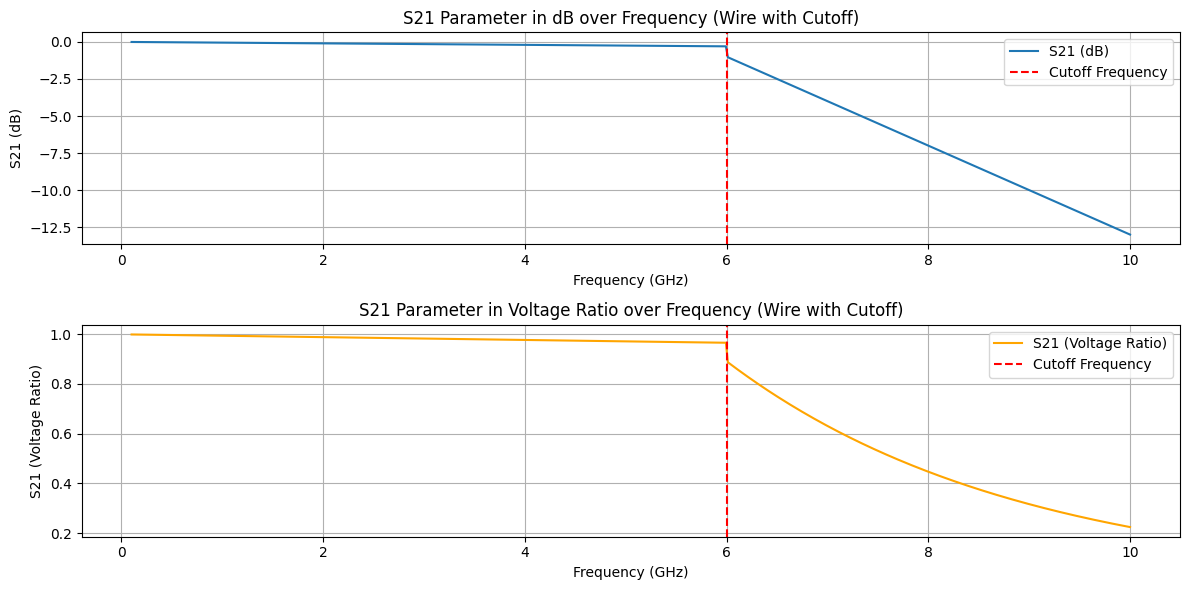

In [3]:
#06.11 16:38 vo chatgpt
import numpy as np
import matplotlib.pyplot as plt

# Frequency range (in GHz)
frequencies_ghz = np.linspace(0.1, 10, 500)  # 0.1 GHz to 10 GHz

# Simulate an S21 response with a flat response until cutoff, then sharp drop
cutoff_frequency = 6  # Cutoff frequency in GHz
S21_dB = np.where(frequencies_ghz < cutoff_frequency, 
                  -0.05 * frequencies_ghz,               # Low attenuation in passband
                  -3 * (frequencies_ghz - cutoff_frequency) - 1)  # Sharp drop after cutoff

# Convert S21 from dB to linear scale (voltage ratio)
S21_voltage_ratio = 10 ** (S21_dB / 20)

# Plot S21 in dB over frequency
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencies_ghz, S21_dB, label="S21 (dB)")
plt.axvline(x=cutoff_frequency, color='r', linestyle='--', label="Cutoff Frequency")
plt.title("S21 Parameter in dB over Frequency (Wire with Cutoff)")
plt.xlabel("Frequency (GHz)")
plt.ylabel("S21 (dB)")
plt.grid(True)
plt.legend()

# Plot S21 in voltage ratio (linear scale) over frequency
plt.subplot(2, 1, 2)
plt.plot(frequencies_ghz, S21_voltage_ratio, label="S21 (Voltage Ratio)", color="orange")
plt.axvline(x=cutoff_frequency, color='r', linestyle='--', label="Cutoff Frequency")
plt.title("S21 Parameter in Voltage Ratio over Frequency (Wire with Cutoff)")
plt.xlabel("Frequency (GHz)")
plt.ylabel("S21 (Voltage Ratio)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

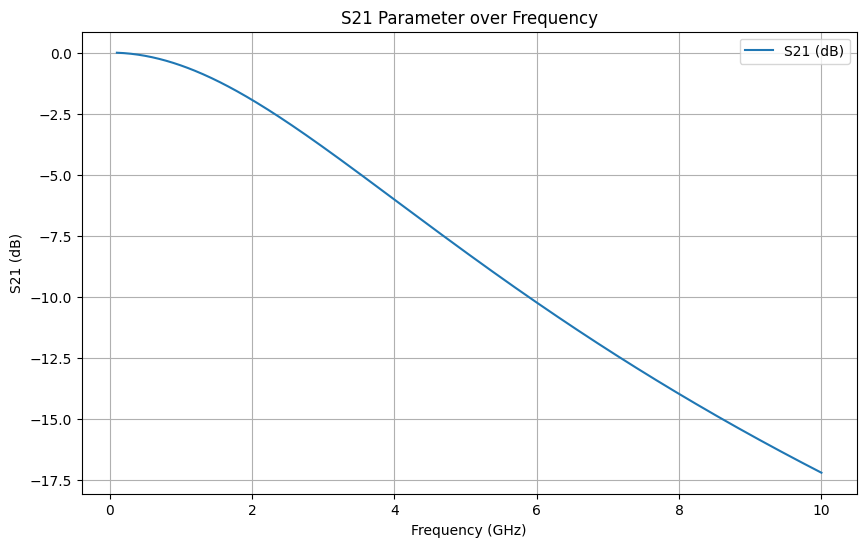

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Frequency range (in GHz)
frequencies_ghz = np.linspace(0.1, 10, 500)  # From 0.1 GHz to 10 GHz

# Simulate an example S21 response in dB (low-pass response)
# This is an arbitrary response chosen for illustration; in a real application, this would come from measurements or a model
S21_dB = -20 * np.log10(1 + (frequencies_ghz / 4)**2)

# Plot S21 in dB over frequency
plt.figure(figsize=(10, 6))
plt.plot(frequencies_ghz, S21_dB, label="S21 (dB)")
plt.title("S21 Parameter over Frequency")
plt.xlabel("Frequency (GHz)")
plt.ylabel("S21 (dB)")
plt.grid(True)
plt.legend()
plt.show()

In [12]:
import numpy as np

# Parameters for the Gaussian distribution
mean = 0       # Center of the Gaussian
std_dev = 1    # Spread of the Gaussian

# Define a range of values (e.g., -3 to 3 standard deviations)
x = np.linspace(-3*std_dev, 3*std_dev, 100)

# Compute Gaussian weights
weights = np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Normalize weights to get probabilities (sum to 1)
probabilities = weights / weights.sum()

# `probabilities` now contains values weighted by a Gaussian distribution
print(probabilities)

[0.00026925 0.00032235 0.0003845  0.00045695 0.00054107 0.00063831
 0.00075028 0.00087865 0.00102522 0.00119184 0.00138047 0.00159309
 0.00183172 0.00209837 0.00239502 0.00272358 0.00308587 0.00348353
 0.00391801 0.00439053 0.004902   0.00545298 0.00604366 0.00667376
 0.00734253 0.0080487  0.00879045 0.00956534 0.01037039 0.01120197
 0.01205587 0.01292729 0.01381087 0.01470075 0.0155906  0.01647369
 0.01734298 0.0181912  0.01901095 0.0197948  0.0205354  0.0212256
 0.02185857 0.02242787 0.02292764 0.02335261 0.02369824 0.02396083
 0.0241375  0.02422632 0.02422632 0.0241375  0.02396083 0.02369824
 0.02335261 0.02292764 0.02242787 0.02185857 0.0212256  0.0205354
 0.0197948  0.01901095 0.0181912  0.01734298 0.01647369 0.0155906
 0.01470075 0.01381087 0.01292729 0.01205587 0.01120197 0.01037039
 0.00956534 0.00879045 0.0080487  0.00734253 0.00667376 0.00604366
 0.00545298 0.004902   0.00439053 0.00391801 0.00348353 0.00308587
 0.00272358 0.00239502 0.00209837 0.00183172 0.00159309 0.0013804

In [5]:
import numpy as np

def inverse_S21_dB(S21_dB):
    """
    Calculate the frequency in GHz from a given S21 value in dB
    for the function S21_dB = -20 * log10(1 + (f / 4)^2).

    Parameters:
    S21_dB : float or numpy array
        The S21 value in dB.

    Returns:
    frequency : float or numpy array
        The corresponding frequency in GHz.
    """
    # Calculate the frequency using the inverse formula
    frequency = 4 * np.sqrt(10 ** (S21_dB / -20) - 1)
    return frequency

# Example usage
S21_dB_values = np.array([-3, -6, -10, -20])  # S21 values in dB
frequencies = inverse_S21_dB(S21_dB_values)

print("S21_dB values:", S21_dB_values)
print("Corresponding frequencies in GHz:", frequencies)

S21_dB values: [ -3  -6 -10 -20]
Corresponding frequencies in GHz: [ 2.56916343  3.99051338  5.88187407 12.        ]


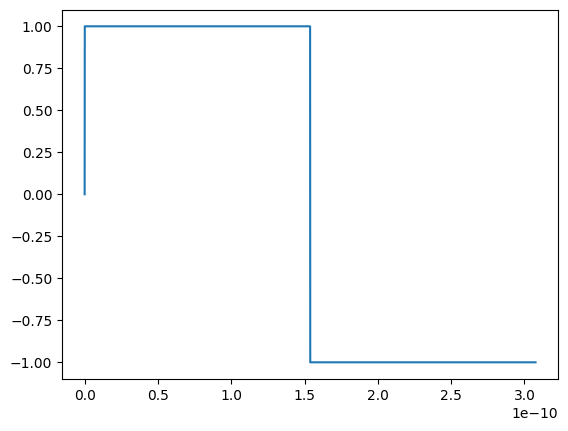

In [11]:

import numpy as np
import matplotlib.pyplot as plt

freq = 3.25e9  # Frequency of the square wave signal
pulse_duration = 1 / freq  # Pulse duration for a 3.25 GHz square wave
sampling_rate = 100e11  # High sampling rate for accurate FFT
t = np.arange(0, pulse_duration, 1 / sampling_rate)  # Time vector

# Create a repeating square wave signal in time domain
num_cycles = 1  # Number of cycles of the square wave
t_repeating = np.arange(0, num_cycles * pulse_duration, 1 / sampling_rate)
repeating_square_pulse = np.sign(np.sin(2 * np.pi * 3.25e9 * t_repeating))

plt.plot(t_repeating, repeating_square_pulse)